<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 
This is first laboratory task for the course TSA.
The Lab is desinged to impove skills of tuning parameters of ES models and get experience of coding of simple Regression Models.

The Lab should take about 5-6 hours to be completed.

<h1 align="center">Important Info</h1> 
- <span style="font-size: 14pt;"> You must send your solution to the email </span> <span style="color:red; font-size: 12pt;">alexromsput@gmail.com, </span>
- The theme of your message must be <span style="color:red; font-size: 12pt;"> TSA-Erevan-2017-[Your Surname] </span>, for exmaple -- TSA-Erevan-2017-Romanenko,
- The file in attachment of the letter must be named as <span style="color:red; font-size: 12pt;"> [Surname]-[Group]-Lab1.ipnb</span>, for example -- Romanenko-Evening-Lab1.ipnb,
  
<span style="color:red; font-size: 14pt;"> DEADLINE: 7 June 2017 23:59:59 </span>


<h1 align="center">1. Realization of ES models(50%)</h1>
Solve the task fo Prcatice Day 1 and put you solution (that means cells and outputs) below

see practical1 folder

<h1 align="center">2. Forecasting real TS (50%)</h1>

* I.   Download datasets (see Student ID in sheet 'Notes' <a href="https://drive.google.com/open?id=11-lzxxR0aeBmEDGEW1GiIaP4X3fyCTHxTg4b0wALpzs">here </a>) and put it into pandas Data Frame:
     - for those whose Student ID = 0 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> 
     - for those whose Student ID = 1 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> 
     - for those whose Student ID = 2 mod 3 - <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>
     
<a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link to the folder with datasets</a>

Answer questions: are there TS with seaonality in data? which is the seasonality period?
(Hint: you just need to look at aggregate data by each shop).

* II. Define the beginning of the history and the end of the history of TS (for TS_dep36.csv the beginning is 12.05.2005, the end is 13.06.2006)
    
* III. For TS_dep36.csv Find the best ES algorithm (it means ES model + its optimal parameters) for each TS by next sheme:
     
     
     - 0) Use only following ES models: IES (see seminar 2), AES (see seminar 2), Winters with additive seasonality (see Practice Day 1 task 3), Theil-Wage (see Practice Day 1 task 4).
     
     
     - 1) forecasting delay $h = 1$, loss function is MACAPE;
     
     
     - 2) For all models find optimal params of each ES models using first 75% of dates (for TS_dep36.csv from 12.05.2005 to 12.03.2006);
     
     
     - 3) forecast each TS by each ES Model with optimal params using first 90% of dates (for TS_dep36.csv from 12.05.2005 to 30.04.2006);
     - 4) find the optimal ES algorithm: just compare losses of ES models with optimal params calclated for dates that were not used for tuning parameters (for TS_dev36.csv: from 13.03.2006 to 30.04.2006).
    
    You need to remember optimal ES algorithm for each TS!
    
     - 5) Build barchar (histogram) of losses of optimal ES algorithm (were calulated at step before) for all TS (axis x - value of loss, axis y - percentage of TS that have such loss). Here you must exclude those TS which has only NaNs in period under consideration.
            
* IV. Calculate Forecast for each TS by optimal TS algorithm that you find in step 3 for all dates (for TS_dep36.csv from 12.05.2005 to 13.06.2006). 

       
     - 1) Measure accuracy (loss) of forecast for each TS using dates that were not used in step 2)-3) (for TS_dep36.csv from 12.05.2005 to 12.03.2006), here you must exclude those TS which has only NaNs in the end.
    
     - 2) Build barchar (histogram) of losses of optimal ES algorithm for all TS (axis x - value of loss, axis y - percentage of TS that has such loss), here you must exclude those TS which has only NaNs in period under consideration.

     - 3) Are barcharts calculated in step III.4) and in step IV.2) the same? If they differ than say in what manner.

I. Download datasets (see Student ID in sheet 'Notes' here ) and put it into pandas Data Frame:

In [2]:
import statsmodels.api as sm
# start with this code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
from datetime import datetime, timedelta

%matplotlib inline

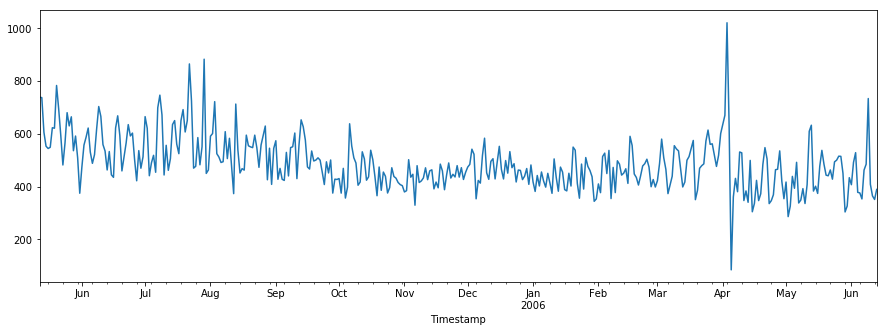

In [3]:
ts = pd.read_csv('TS_dep36.csv', sep=';', decimal=',', index_col='Timestamp', parse_dates=True, dayfirst=True)
ts.sum(axis = 1).plot(figsize=(15,5))
ts36 = ts.sum(axis = 1)

In [4]:
ts.head()

,item 1758,item 40010,item 35731,item 96474,item 97519,item 75501,item 95519,item 93400,item 99826,item 57813,...,item 65825,item 31454,item 29014,item 49139,item 42190,item 8110,item 80718,item 29092,item 76501,item 32258
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-05-12,0.000,0.000,2.484,0.000,0.0,1.334,1,1,2.0,0,...,7,12,0.0,66.324,32.864,12,23,63,14,177
2005-05-13,0.878,0.983,2.632,1.120,1.0,3.514,4,0,1.0,0,...,16,17,0.0,69.952,34.024,24,30,97,13,63
2005-05-14,0.332,1.346,2.016,0.302,1.0,2.590,0,2,0.0,1,...,11,12,0.0,35.366,31.626,20,0,80,12,94
2005-05-15,0.000,0.556,0.882,0.000,4.0,1.708,1,1,1.0,2,...,9,15,0.0,37.898,43.726,20,0,64,6,105
2005-05-16,0.438,0.671,0.314,1.486,2.0,2.790,3,0,2.0,1,...,11,11,0.0,49.566,34.548,23,0,43,4,51


II. Define the beginning of the history and the end of the history of TS (for TS_dep36.csv the beginning is 12.05.2005, the end is 13.06.2006)

In [131]:
ts = ts.loc['05.12.2005':'06.13.2006']
ts_train = ts.loc[:'03.12.2006']
ts_valid = ts.loc['03.12.2006':'04.30.2006']
ts_test = ts.loc['04.30.2006':'06.13.2006']

III. For TS_dep36.csv Find the best ES algorithm (it means ES model + its optimal parameters) for each TS by next sheme:

- 0) Use only following ES models: IES (see seminar 2), AES (see seminar 2), Winters with additive seasonality (see Practice Day 1 task 3), Theil-Wage (see Practice Day 1 task 4).
     
     
- 1) forecasting delay $h = 1$, loss function is MACAPE;

In [152]:
h=1
# loss function
def MSE(x,y):
    x = np.nan_to_num(x)
    y = np.nan_to_num(y)
    qlt = np.mean(np.abs(x-y))
    return qlt

In [7]:
# models
def InitExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + alpha*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

In [8]:
def AdaptiveExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = np.NaN
    t0= np.NaN
    e1= np.NaN
    e2= np.NaN
    Kt_1 = alpha
    K=alpha
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
                e1=alpha
                e2 = 1
            else:
                if (t-t0)<h:
                    e1 = gamma*(x[t]-y)+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-y)+(1-gamma)*e2
                else:
                    e1 = gamma*(x[t]-FORECAST[t])+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-FORECAST[t])+(1-gamma)*e2
            
            if e2==0:
                K=alpha
            else:
                K=np.abs(e1/e2)

            alpha=Kt_1
            Kt_1=K

            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha)*(t-t0+1)/(AdaptationPeriod) + (1-(1-alpha)*(t-t0+1)/(AdaptationPeriod))*x[t]
            else:
                y = y*(1-alpha) + (alpha)*x[t]
        FORECAST[t+h] = y
    return FORECAST

In [9]:
def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= x[0]
    s= [0]* (p)

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[cntr]
            
            if math.isnan(s[cntr % p]):
                s[cntr % p] = s([(cntr-1)%p])
            l_old = l
            l = l*(1-alpha) + alpha*(x[cntr]-s[cntr % p])
            s[cntr % p] = (1-delta)*s[cntr % p] + delta *(x[cntr]-l_old)
            
        FORECAST[cntr+h] = l + s[(cntr+h)% p]
    return FORECAST

In [10]:
def WageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    beta = Params['beta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= x[0]
    b = 0
    s= [0]* (p)

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[cntr]
            
            if math.isnan(s[cntr % p]):
                s[cntr % p] = s([(cntr-1)%p])
            l_old = l
            l = (l+b)*(1-alpha) + alpha*(x[cntr]-s[cntr % p])
            b = beta * (l-l_old) + (1-beta) * b
            s[cntr % p] = (1-delta)*s[cntr % p] + delta *(x[cntr]-l)
            
        FORECAST[cntr+h] = l+ b + s[(cntr+h)% p]
    return FORECAST

- 2) For all models find optimal params of each ES models using first 75% of dates (for TS_dep36.csv from 12.05.2005 to 12.03.2006);

In [84]:
def find_params(ts, model, params,name):
    ALPHA = params
    FRC_TS = dict()
    ts1 = pd.DataFrame(ts)
    i=0
    for cntr in ts1.columns:
        loss = np.Inf
        alp  = {}
        for alpha in ALPHA:
            mdl = np.array(model(ts1[cntr], h, alpha))
            loss_new = MSE(mdl[1:], np.array(ts1[cntr]))
            if float(loss_new)<float(loss):
                loss = loss_new
                alp = alpha
        print(cntr, alp)
        FRC_TS[str(cntr)] = alp, loss_new, name
    return FRC_TS

# for winters

In [85]:
from sklearn.grid_search import ParameterGrid
param_grid = {'alpha': np.linspace(0.05,1.05,11), 'delta': np.linspace(0.05,1.05,11), 'seasonality_period': [7]}
grid = ParameterGrid(param_grid)

best_winter = find_params(pd.DataFrame(ts_train),WintersExponentialSmoothing, list(grid),'winter')

item 1758 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 40010 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 35731 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 96474 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 97519 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 75501 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 95519 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 93400 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 99826 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 57813 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 19765 {'alpha': 

item 94387 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 37104 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 12558 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 42344 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 51811 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 42887 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 49550 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 30509 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 45937 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 87475 {'alpha': 0.95000000000000007, 'seasonality_period': 7, 'delta': 0.050000000000000003}
item 95527 {'alpha':

# for INIT

In [86]:
from sklearn.grid_search import ParameterGrid
param_grid = {'alpha': np.arange(0.05,1.05,0.10), 'AdaptationPeriod': [40,50,80,100]}
grid = ParameterGrid(param_grid)

best_init = find_params(pd.DataFrame(ts_train),InitExponentialSmoothing, list(grid), 'init')

item 1758 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100}
item 40010 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100}
item 35731 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100}
item 96474 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100}
item 97519 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100}
item 75501 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100}
item 95519 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100}
item 93400 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100}
item 99826 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100}
item 57813 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100}
item 19765 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100}
item 73140 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100}
item 34535 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100}
item 100162 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100}
item 95431 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 

# for Adaptive

In [87]:
from sklearn.grid_search import ParameterGrid
param_grid = {'alpha': np.arange(0.05,1.05,0.10), 'gamma': np.arange(0.05,1.05,0.10), 'AdaptationPeriod': [100]}
grid = ParameterGrid(param_grid)

best_adapt = find_params(pd.DataFrame(ts_train),AdaptiveExponentialSmoothing, list(grid), 'adaptive')

item 1758 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 40010 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 35731 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 96474 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 97519 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 75501 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 95519 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 93400 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 99826 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 57813 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 19765 {'alpha': 0.95000000

item 37104 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 12558 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 42344 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 51811 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 42887 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 49550 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 30509 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 45937 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 87475 {'alpha': 0.8500000000000002, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 95527 {'alpha': 0.95000000000000018, 'AdaptationPeriod': 100, 'gamma': 0.95000000000000018}
item 65825 {'alpha': 0.95000000

# for wage model

In [88]:
from sklearn.grid_search import ParameterGrid
param_grid = {'alpha': np.arange(0.05,1.05,0.20), 'delta': np.arange(0.05,1.05,0.20),'beta': np.arange(0.05,1.05,0.20), 'seasonality_period': [7]}
grid = ParameterGrid(param_grid)

best_wage = find_params(pd.DataFrame(ts_train),WageExponentialSmoothing, list(grid), 'adaptive')

item 1758 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta': 0.050000000000000003}
item 40010 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta': 0.050000000000000003}
item 35731 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta': 0.050000000000000003}
item 96474 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta': 0.050000000000000003}
item 97519 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta': 0.050000000000000003}
item 75501 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta': 0.050000000000000003}
item 95519 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta': 0.050000000000000003}
item 93400 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta':

item 75798 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta': 0.050000000000000003}
item 44060 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta': 0.050000000000000003}
item 23127 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta': 0.050000000000000003}
item 98918 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta': 0.050000000000000003}
item 30048 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta': 0.050000000000000003}
item 65016 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta': 0.050000000000000003}
item 97666 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta': 0.050000000000000003}
item 83685 {'alpha': 0.85000000000000009, 'seasonality_period': 7, 'beta': 0.050000000000000003, 'delta'

- 3) forecast each TS by each ES Model with optimal params using first 90% of dates (for TS_dep36.csv from 12.05.2005 to 30.04.2006);
- 4) find the optimal ES algorithm: just compare losses of ES models with optimal params calclated for dates that were not used for tuning parameters (for TS_dev36.csv: from 13.03.2006 to 30.04.2006).
    
    You need to remember optimal ES algorithm for each TS!

In [92]:
# fpr example
best_init['item 57813'][0]

{'AdaptationPeriod': 100, 'alpha': 0.95000000000000018}

In [153]:
best = dict()
for key in best_wage:
    loss = [1,1,1,1]
    param = [best_init[key], best_adapt[key],best_winter[key],best_wage[key]]
    mdl = np.array(InitExponentialSmoothing(ts_valid[key], h, best_init[key][0]))
    loss[0] = MSE(mdl[1:], np.array(ts_valid[key]))
    mdl = np.array(AdaptiveExponentialSmoothing(ts_valid[key], h, best_adapt[key][0]))
    loss[1] = MSE(mdl[1:], np.array(ts_valid[key]))
    mdl = np.array(WintersExponentialSmoothing(ts_valid[key], h, best_winter[key][0]))
    loss[2] = MSE(mdl[1:], np.array(ts_valid[key]))
    mdl = np.array(WageExponentialSmoothing(ts_valid[key], h, best_wage[key][0]))
    loss[3] = MSE(mdl[1:], np.array(ts_valid[key]))
    best[key] = param[np.argmin(loss)][0],param[np.argmin(loss)][2], min(loss)

In [154]:
# for example
best['item 27375']

({'AdaptationPeriod': 100, 'alpha': 0.95000000000000018},
 'init',
 0.018063558069771727)

 - 5) Build barchar (histogram) of losses of optimal ES algorithm (were calulated at step before) for all TS (axis x - value of loss, axis y - percentage of TS that have such loss). Here you must exclude those TS which has only NaNs in period under consideration.

In [155]:
losses = []
for key in best:
    losses.append((best[key])[2])

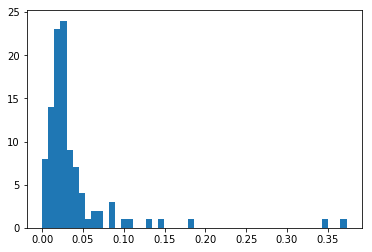

In [159]:
# there are few that have more then 0.5 loss
hist1 = plt.hist([i for i in losses if i < 0.5], bins=50)

* IV. Calculate Forecast for each TS by optimal TS algorithm that you find in step 3 for all dates (for TS_dep36.csv from 12.05.2005 to 13.06.2006). 

       
     - 1) Measure accuracy (loss) of forecast for each TS using dates that were not used in step 2)-3) (for TS_dep36.csv from 12.05.2005 to 12.03.2006), here you must exclude those TS which has only NaNs in the end.
    
     - 2) Build barchar (histogram) of losses of optimal ES algorithm for all TS (axis x - value of loss, axis y - percentage of TS that has such loss), here you must exclude those TS which has only NaNs in period under consideration.

     - 3) Are barcharts calculated in step III.4) and in step IV.2) the same? If they differ than say in what manner.

In [160]:
best_test = dict()
for key in best_wage:
    mod_func = WintersExponentialSmoothing
    if (best[key])[1] is 'init':
        mod_func = InitExponentialSmoothing
    if (best[key])[1] is 'adaptive':
        mod_func = AdaptiveExponentialSmoothing
    if (best[key])[1] is 'wage':
        mod_func = WageExponentialSmoothing
        
    mdl = np.array(mod_func(ts_test[key], h, best[key][0]))
    loss = MSE(mdl[1:], np.array(ts_test[key]))
    
    best_test[key] = best[key][0], best[key][1], loss 

In [161]:
losses_t = []
for key in best_test:
    losses_t.append((best_test[key])[2])

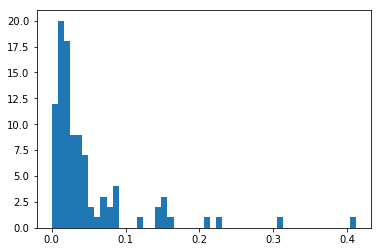

In [162]:
hist2 = plt.hist([i for i in losses_t if i < 0.5], bins=50)

histogram moved right a little bit and there are biger values of loss that are now more populated